### Import Packages

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
import pandas as pd
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Face Detection

### Prepare File

In [112]:
vid = "/content/drive/MyDrive/thumbnail_generator/face_detection/아이스버거.mp4"

### Convert Video File to DataFrame

In [113]:
frames_df = pd.DataFrame(columns=["frame","image"])

In [114]:
vidcap = cv2.VideoCapture(vid)
length = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))

count = 0
while(vidcap.isOpened()):
  ret, image = vidcap.read()
  # read()는 grab()와 retrieve() 두 함수를 한 함수로 불러옴
  # 두 함수를 동시에 불러오는 이유는 프레임이 존재하지 않을 때
  # grab() 함수를 이용하여 return false 혹은 NULL 값을 넘겨 주기 때문
  if (int(vidcap.get(1)) % 20 == 0):
    print("비디오 처리중 ...(",round(int(vidcap.get(1))/length*100),"%)")
    frames_df = frames_df.append({"frame": count,"image":cv2.cvtColor(image, cv2.COLOR_BGR2RGB)},ignore_index=True)  #frames_df에 프레임값과 image(RGB 순으로 변환) 추가
    count += 1
  elif ret is False:
    break
vidcap.release()

비디오 처리중 ...( 1 %)
비디오 처리중 ...( 2 %)
비디오 처리중 ...( 3 %)
비디오 처리중 ...( 4 %)
비디오 처리중 ...( 5 %)
비디오 처리중 ...( 7 %)
비디오 처리중 ...( 8 %)
비디오 처리중 ...( 9 %)
비디오 처리중 ...( 10 %)
비디오 처리중 ...( 11 %)
비디오 처리중 ...( 12 %)
비디오 처리중 ...( 13 %)
비디오 처리중 ...( 14 %)
비디오 처리중 ...( 15 %)
비디오 처리중 ...( 16 %)
비디오 처리중 ...( 17 %)
비디오 처리중 ...( 18 %)
비디오 처리중 ...( 20 %)
비디오 처리중 ...( 21 %)
비디오 처리중 ...( 22 %)
비디오 처리중 ...( 23 %)
비디오 처리중 ...( 24 %)
비디오 처리중 ...( 25 %)
비디오 처리중 ...( 26 %)
비디오 처리중 ...( 27 %)
비디오 처리중 ...( 28 %)
비디오 처리중 ...( 29 %)
비디오 처리중 ...( 30 %)
비디오 처리중 ...( 31 %)
비디오 처리중 ...( 33 %)
비디오 처리중 ...( 34 %)
비디오 처리중 ...( 35 %)
비디오 처리중 ...( 36 %)
비디오 처리중 ...( 37 %)
비디오 처리중 ...( 38 %)
비디오 처리중 ...( 39 %)
비디오 처리중 ...( 40 %)
비디오 처리중 ...( 41 %)
비디오 처리중 ...( 42 %)
비디오 처리중 ...( 43 %)
비디오 처리중 ...( 44 %)
비디오 처리중 ...( 46 %)
비디오 처리중 ...( 47 %)
비디오 처리중 ...( 48 %)
비디오 처리중 ...( 49 %)
비디오 처리중 ...( 50 %)
비디오 처리중 ...( 51 %)
비디오 처리중 ...( 52 %)
비디오 처리중 ...( 53 %)
비디오 처리중 ...( 54 %)
비디오 처리중 ...( 55 %)
비디오 처리중 ...( 56 %)
비디오 처리중 ...( 57 %)
비

In [115]:
frames_df.head()

,frame,image
0,0,"[[[141, 157, 155], [141, 157, 155], [141, 157,..."
1,1,"[[[86, 107, 116], [86, 107, 116], [86, 107, 11..."
2,2,"[[[86, 107, 114], [86, 107, 114], [86, 107, 11..."
3,3,"[[[84, 107, 116], [84, 107, 116], [84, 107, 11..."
4,4,"[[[84, 107, 116], [84, 107, 116], [84, 107, 11..."


In [116]:
frames_raw= frames_df.copy()

In [117]:
len(frames_df)

92

### Face Detection for All Frames

In [118]:
frames_df = frames_raw
face_cascade = cv2.CascadeClassifier("/content/drive/MyDrive/thumbnail_generator/face_detection/haarcascade_frontalface_default.xml")

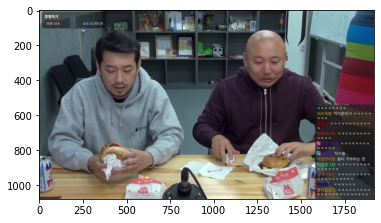

In [119]:
plt.imshow(frames_df.iloc[0,1])

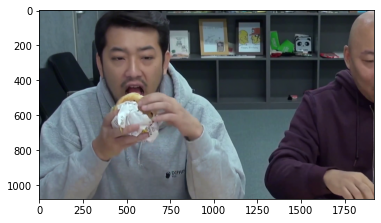

In [120]:
plt.imshow(frames_df.iloc[1,1])

In [121]:
face_df = pd.DataFrame(columns=["image","face_image","roi_color__1"])

max_face = 1

for idx in range(len(frames_df)): #한 프레임 당 이미지, 얼굴인식
  frm = frames_df.iloc[idx,0]
  im = frames_df.iloc[idx,1]
  im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
  face_im = im.copy()
  
  faces = face_cascade.detectMultiScale(im_gray, 1.3, 5)
  
  if len(faces)>0: #face 인식 된 경우만
    now_face = len(faces)

    #인식된 얼굴 수 맞춰서 컬럼 추가
    if now_face > max_face :
            current_face = max_face
            max_face = now_face

            new = {}
            for plus in range(max_face - current_face):
              new["roi_color__" + str(current_face+plus+1)] = [np.nan]*len(face_df)
            new_df = pd.DataFrame(data = new)
            face_df = pd.concat( [face_df, new_df] , axis = 1)
            face_df.head()

    new_face = {"image" : im}

    for n_th in range(now_face):
        for (x,y,w,h) in [faces[n_th]]:
          x = round(x - w * 0.1)
          y = round(y - h * 0.3)
          w = round(w * 1.2)
          h = round(h * 1.4)
          
          cv2.rectangle(face_im,(x,y),(x+w,y+h),(255,0,0),2) # 원본 영상에 위치 표시
          roi_color = im[y:y+h, x:x+w] # roi 
          new_face["roi_color__" + str(n_th+1)] = roi_color
          
        new_face["face_image"] = face_im

    face_df = face_df.append(new_face,ignore_index=True)

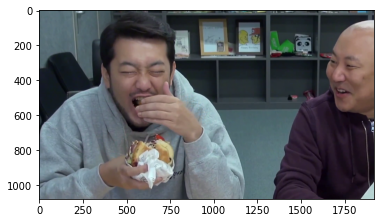

In [122]:
plt.imshow(face_df.iloc[5,0]) #전체 이미지

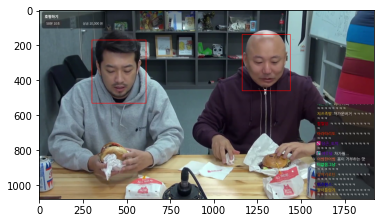

In [123]:
plt.imshow(face_df.iloc[0,1]) #얼굴영역 표시 이미지

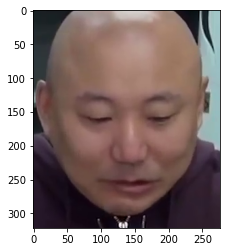

In [124]:
plt.imshow(face_df.iloc[0,2]) #첫번째 사람 얼굴

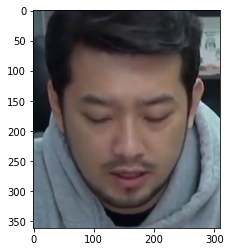

In [125]:
plt.imshow(face_df.iloc[0,3]) #두번째 사람 얼굴

In [126]:
len(face_df)

83

#Emotion Classifier

In [127]:
emotion_classifier = load_model('/content/drive/MyDrive/thumbnail_generator/face_detection/emotion_model.hdf5', compile=False)
EMOTIONS = ["Angry" ,"Disgusting","Fearful", "Happy", "Sad", "Surpring", "Neutral"]

In [128]:
len(face_df)

83

In [129]:
col = len(face_df.columns)-2
final_lst = []

for i in range(len(face_df)):
  emt_lst = []
  emt = 0
  n = 0
  for face_n in range(col):
    try: 
      len(face_df.iloc[i,face_n+2]) > 0    
    except:       
      pass
    else:
      if len(face_df.iloc[i,face_n+2]) > 0:
        canvas = np.zeros((250, 300, 3), dtype="uint8")
        image = face_df.iloc[i,face_n+2]
        roi_gray =  cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = roi_gray.astype("float") / 255.0
        roi_gray = img_to_array(roi_gray)
        roi_gray = np.expand_dims(roi_gray, axis=0)

      preds = emotion_classifier.predict(roi_gray)[0]
      emotion_probability = np.max(preds)

      n += 1
      emt += emotion_probability
  
  if n>0:
    emt_lst.append(emt/n)
    final_lst.append(emt_lst)

final_df = face_df.copy()
final_df["emt_mean"] = final_lst

In [131]:
final_df.sort_values(by= "emt_mean", inplace = True,ascending=False)
                     

In [132]:
final_df.head()

,image,face_image,roi_color__1,roi_color__2,roi_color__3,emt_mean
18,"[[[143, 157, 153], [143, 157, 153], [143, 157,...","[[[143, 157, 153], [143, 157, 153], [143, 157,...","[[[24, 30, 33], [19, 28, 28], [19, 28, 28], [1...",NaN,NaN,[0.6600684523582458]
37,"[[[145, 161, 159], [145, 161, 159], [145, 161,...","[[[145, 161, 159], [145, 161, 159], [145, 161,...","[[[97, 103, 106], [99, 105, 106], [104, 110, 1...",NaN,NaN,[0.6516497135162354]
74,"[[[142, 155, 154], [142, 155, 154], [142, 155,...","[[[142, 155, 154], [142, 155, 154], [142, 155,...","[[[39, 42, 49], [39, 42, 49], [39, 42, 49], [3...",NaN,NaN,[0.6304003596305847]
67,"[[[26, 32, 33], [26, 32, 33], [26, 32, 33], [2...","[[[26, 32, 33], [26, 32, 33], [26, 32, 33], [2...","[[[39, 40, 43], [39, 40, 43], [41, 43, 43], [4...",NaN,NaN,[0.6263784766197205]
68,"[[[22, 28, 29], [22, 28, 29], [22, 28, 29], [2...","[[[22, 28, 29], [22, 28, 29], [22, 28, 29], [2...",[],NaN,NaN,[0.6263784766197205]


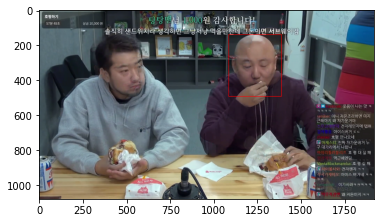

In [133]:
plt.imshow(final_df.iloc[0,1])

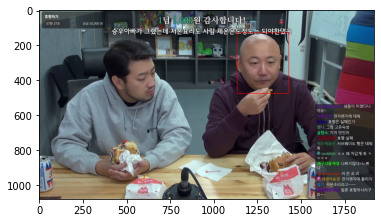

In [134]:
plt.imshow(final_df.iloc[1,1])

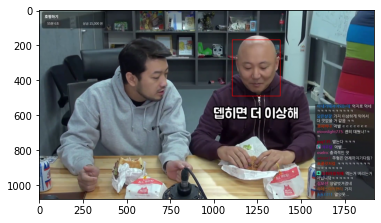

In [135]:
plt.imshow(final_df.iloc[2,1])